
> #### <div style="color:#17163D">**”Glad tidings is for he who knoweth the sign. Many are the subtleties, the confidant of mysteries is where?”**📊💞💫
Hafiz<br/>
</div>

# <div style="color:#17163D">Providing Data-Driven Insights to Customer Service Team</div>
## <div style="color:#17163D">Introduction</div>
<div style="color:#17163D">
In this post, I am going to do an end-to-end BI project for the customer service team at Reve Fiber. Reve Fiber provides its customers with fiber optic internet. They want to explore the customer service data to find trends of repeat calls and thereby improve their services. 

Every BI project is typically comprised of three steps. In the first step, I will start with developing the documents stipulating the problem to be solved, the success criteria using SMART, the desired results, the deliverables, and metrics including a detailed description of desired charts and the datasets to be used in the project along with all assumptions and considerations.

In the second step, I am going to design an ETL pipeline to extract the required data from different sources, transform it to the appropriate format and load it to a destination table ready to be analyzed. 

And finally, in the third step, I analyze the data and create dashboards to provide the stakeholders with the required insights.
</div>

## <div style="color:#17163D">Project Background</div>

<div style="color:#17163D">
Reve Fiber provides people and businesses with fiber optic internet. Currently, the customer service team working in their call centers answers calls from customers in their established service areas. In this project the team is interested in exploring trends in repeat calls to reduce the number of times customers have to call in order for an issue to be resolved.

To put it more precisely, the team needs to understand how often customers again phone customer support after their first inquiry; this will help leaders understand whether the team is able to answer customer questions the first time. Further, leaders want to explore trends in repeat calls to identify why customers are having to call more than once, as well as how to improve the overall customer experience.

## Questions

- How often does the customer service team receive repeat calls from customers?
- What problem types generate the most repeat calls?
- Which market city’s customer service team receives the most repeat calls?


## Measure Success

The team’s ultimate goal is to reduce call volume by increasing customer satisfaction and improving operational optimization. The final dashboard should demonstrate an understanding of this goal and provide stakeholders with insights about repeat caller volumes in different markets and the types of problems they represent.
    
## Success Criteria using SMART Criteria

- **Specific**: BI insights must clearly identify the specific characteristics of a repeat calls, including how often customers are repeating calls. 
- **Measurable**: Calls should be evaluated using measurable metrics, including frequency and volume. For example, do customers call with a specific problem more often than others? Which market city experiences the most call? How many customers are calling more than once? 
- **Action-oriented**: These outcomes must quantify the number of repeat callers under different circumstances to provide the Reve Fiber team with insights into customer satisfaction. 
- **Relevant**: All metrics must support the primary question: How often are customers repeatedly contacting the customer service team? 
- **Time-bound**: Analyze data that spans at least one year to understand how repeat callers change over time. Exploring data that spans multiple months will capture peaks and valleys in usage. 


## Desired Results
    
- Understand how often customers are calling customer support after their first inquiry; this will help leaders understand how effectively the team is able to answer customer questions the first time
- Provide insights into the types of customer issues that seem to generate more repeat calls
- Explore repeat caller trends in the three different market cities
- Design charts so that stakeholders can view trends by week, month, quarter, and year. 

## Deliverables and Metrics

- A chart or table measuring repeat calls by their first contact date
- A chart illustrating the market and problem type of first repeat calls
- A chart or table exploring repeat calls by market and problem type
- Charts showcasing repeat calls by week, month, and quarter

## Charts

Chart |Title |Type |Dimension(s) |Metrics |
-----|-----| -----|-----|-----|
Chart 1 |Repeat calls by first date |Table |Day of initial call, subsequent repeat calls |Contact |
Chart 2 |Market and Problem Type of First Repeat Calls |Bar |Call type, market, contact_n_1 | Contact|
Chart 3 |Calls by Market and Type |Table |Market, call type, day |Contact |
Chart 4 |Repeats by Week and Month |Bar |Date, contact |Contact |

## The Dataset
The dataset includes:
- Date
- Number of calls
- Number of repeat calls after first contact in the following 7 days
- Call type
- Market city
    
## Assumptions
In order to anonymize the data, the data in market city coulumn the columns market_1, market_2, and market_3 indicate three different city service areas the data represents. 
    
The data also lists five problem types:
- Type_1 is account management
- Type_2 is technician troubleshooting
- Type_3 is scheduling
- Type_4 is construction
- Type_5 is internet and wifi

Additionally, the dataset also records repeat calls over seven day periods. The initial contact date is listed as contacts_n. The other call columns are then contacts_n_number of days since first call. For example, contacts_n_6 indicates six days since first contact.   
</div>


<div style="color:#17163D">
    
## ETL
The data I am going to use in this project is in CSV format. There are three CSV files out there, one file for each market; market_1, market_2, and market_3. As for ETL, I have to create a target table to consolidate and store these three datasets. This table will allow me to analyze the data and develop a dashboard to answer the stakeholders' questions.

There are numerous tools and techniques I can use to extract, transform, and then load the data to a destination table. I choose to use SQL. So to be more specific, I am going to load these CSV files into PostgreSQL, merge them into a destination table, and then read the final table into a pandas dataframe for further analysis in Python.

There are many null values in all three datasets, which I must handle before starting to analyze the consolidated data. I can take two approaches to deal with null values; In the first approach, I can replace the null values with 0 while I am moving the data to the destination table. Hence, the destination table is populated with properly cleaned data which is just ready for further analysis. In this approach, I keep the figures as integers that take much less space hence making the final table much faster, less voluminous, and much easier to query.

In the second approach, I keep all null values intact and save the figures as text. This will make the final table take more space and slower to query. Additionally, the data needs preprocessing before it gets ready for analysis. But in the other hand, if I decide to deal with the null values in a more sophisticated way, or keep track of null values in my analysis, this approach is preferred. 

Anyway, I am going to delineate both approaches. 

### Approach One; NOT Handling Null Values in ETL

I'll start by creating a database in PostgreSQL.

```sql
CREATE DATABASE reve_fiber;
```

Now, I am creating three tables and populate them with data from market_1.csv, market_2.csv and market_3.csv files. I'll design contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, and contacts_n_7 columns to be TEXT type so they can keep 'null' strings.

```sql
DROP TABLE IF EXISTS market1 CASCADE;
CREATE TABLE market1 (
    id SERIAL,
    date_created TEXT, 
    contacts_n TEXT, 
    contacts_n_1 TEXT,
    contacts_n_2 TEXT,
    contacts_n_3 TEXT,
    contacts_n_4 TEXT,
    contacts_n_5 TEXT,
    contacts_n_6 TEXT,
    contacts_n_7 TEXT,
    new_type TEXT, 
    new_market TEXT,
    PRIMARY KEY(id)
);

/*Populate market1 with the data from market_1.csv file*/
\copy market1(date_created, contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, contacts_n_7, new_type, new_market) FROM 'E:\Coursera\Mi Portfolio\New folder\Google Fiber\market_1.csv' WITH DELIMITER ',' CSV HEADER  encoding 'UTF8';

DROP TABLE IF EXISTS market2 CASCADE;
CREATE TABLE market2 (
    id SERIAL,
    date_created TEXT, 
    contacts_n TEXT, 
    contacts_n_1 TEXT,
    contacts_n_2 TEXT,
    contacts_n_3 TEXT,
    contacts_n_4 TEXT,
    contacts_n_5 TEXT,
    contacts_n_6 TEXT,
    contacts_n_7 TEXT,
    new_type TEXT, 
    new_market TEXT,
    PRIMARY KEY(id)
);

/*Populate market2 with the data from market_2.csv file*/
\copy market2(date_created, contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, contacts_n_7, new_type, new_market) FROM 'E:\Coursera\Mi Portfolio\New folder\Google Fiber\market_2.csv' WITH DELIMITER ',' CSV HEADER  encoding 'UTF8';

DROP TABLE IF EXISTS market3 CASCADE;
CREATE TABLE market3 (
    id SERIAL,
    date_created TEXT, 
    contacts_n TEXT, 
    contacts_n_1 TEXT,
    contacts_n_2 TEXT,
    contacts_n_3 TEXT,
    contacts_n_4 TEXT,
    contacts_n_5 TEXT,
    contacts_n_6 TEXT,
    contacts_n_7 TEXT,
    new_type TEXT, 
    new_market TEXT,
    PRIMARY KEY(id)
);

/*Populate market3 with the data from market_3.csv file*/
\copy market3(date_created, contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, contacts_n_7, new_type, new_market) FROM 'E:\Coursera\Mi Portfolio\New folder\Google Fiber\market_3.csv' WITH DELIMITER ',' CSV HEADER  encoding 'UTF8';
```
OK! I have imported the CSV files to PostgreSQL. It's time to create the destination table and populate it with consolidated data from tables market1, market2, and market3. For this appraoch, I design contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, and contacts_n_7 columns to be TEXT type to be able to keep 'null' strings.

```sql
DROP TABLE IF EXISTS calls CASCADE;
CREATE TABLE calls (
    id SERIAL,
    date_created TEXT, 
    contacts_n TEXT, 
    contacts_n_1 TEXT,
    contacts_n_2 TEXT,
    contacts_n_3 TEXT,
    contacts_n_4 TEXT,
    contacts_n_5 TEXT,
    contacts_n_6 TEXT,
    contacts_n_7 TEXT,
    new_type TEXT, 
    new_market TEXT,
    PRIMARY KEY(id)
);
```

```sql
/*The UNION ALL statement is applied here instead of a JOIN statement because the tables already have matching columns, making them easy to merge completely.*/
INSERT INTO calls (date_created, contacts_n, contacts_n_1, contacts_n_2,
                   contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, 
                   contacts_n_7, new_type, new_market)
    SELECT
      date_created,
      contacts_n,
      contacts_n_1,
      contacts_n_2,
      contacts_n_3,
      contacts_n_4,
      contacts_n_5,
      contacts_n_6,
      contacts_n_7,
      new_type,
      new_market
    FROM market1
    UNION ALL
    SELECT
      date_created,
      contacts_n,
      contacts_n_1,
      contacts_n_2,
      contacts_n_3,
      contacts_n_4,
      contacts_n_5,
      contacts_n_6,
      contacts_n_7,
      new_type,
      new_market
    FROM market2
    UNION ALL
    SELECT
      date_created,
      contacts_n,
      contacts_n_1,
      contacts_n_2,
      contacts_n_3,
      contacts_n_4,
      contacts_n_5,
      contacts_n_6,
      contacts_n_7,
      new_type,
      new_market
    FROM market3
```
After this query, calls table is populated with all data from market1, market2 and market3 tables. All null values intact and contacts_n_x columns as string.


### Approach Two; Handling Null Values in ETL

Just like the first approach, I'll start by creating a database in PostgreSQL.

```sql
CREATE DATABASE reve_fiber;
```

Now, I am creating three tables and populate them with data from market_1.csv, market_2.csv and market_3.csv files. I design contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, and contacts_n_7 columns to be TEXT type to be able to keep 'null' strings.

```sql
DROP TABLE IF EXISTS market1 CASCADE;


CREATE TABLE market1 (
    id SERIAL,
    date_created TEXT, 
    contacts_n TEXT, 
    contacts_n_1 TEXT,
    contacts_n_2 TEXT,
    contacts_n_3 TEXT,
    contacts_n_4 TEXT,
    contacts_n_5 TEXT,
    contacts_n_6 TEXT,
    contacts_n_7 TEXT,
    new_type TEXT, 
    new_market TEXT,
    PRIMARY KEY(id)
);

/*Populate market1 with the data from market_1.csv file*/
\copy market1(date_created, contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, contacts_n_7, new_type, new_market) FROM 'E:\Coursera\Mi Portfolio\New folder\Google Fiber\market_1.csv' WITH DELIMITER ',' CSV HEADER  encoding 'UTF8';

DROP TABLE IF EXISTS market2 CASCADE;
CREATE TABLE market2 (
    id SERIAL,
    date_created TEXT, 
    contacts_n TEXT, 
    contacts_n_1 TEXT,
    contacts_n_2 TEXT,
    contacts_n_3 TEXT,
    contacts_n_4 TEXT,
    contacts_n_5 TEXT,
    contacts_n_6 TEXT,
    contacts_n_7 TEXT,
    new_type TEXT, 
    new_market TEXT,
    PRIMARY KEY(id)
);

/*Populate market2 with the data from market_2.csv file*/
\copy market2(date_created, contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, contacts_n_7, new_type, new_market) FROM 'E:\Coursera\Mi Portfolio\New folder\Google Fiber\market_2.csv' WITH DELIMITER ',' CSV HEADER  encoding 'UTF8';

DROP TABLE IF EXISTS market3 CASCADE;
CREATE TABLE market3 (
    id SERIAL,
    date_created TEXT, 
    contacts_n TEXT, 
    contacts_n_1 TEXT,
    contacts_n_2 TEXT,
    contacts_n_3 TEXT,
    contacts_n_4 TEXT,
    contacts_n_5 TEXT,
    contacts_n_6 TEXT,
    contacts_n_7 TEXT,
    new_type TEXT, 
    new_market TEXT,
    PRIMARY KEY(id)
);

/*Populate market3 with the data from market_3.csv file*/
\copy market3(date_created, contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, contacts_n_7, new_type, new_market) FROM 'E:\Coursera\Mi Portfolio\New folder\Google Fiber\market_3.csv' WITH DELIMITER ',' CSV HEADER  encoding 'UTF8';
```
OK! I have imported the CSV files to PostgreSQL. It's time to create the destination table and populate it with consolidated data from tables market1, market2, and market3. For this appraoch, I design contacts_n, contacts_n_1, contacts_n_2, contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, and contacts_n_7 columns to be INTEGER as I am going to replace 'null' values with 0 and keep all figures as integers.

```sql
/*The UNION ALL statement is applied here instead of a JOIN statement because the tables already have matching columns, making them easy to merge completely.*/
CREATE TABLE calls (
    id SERIAL,
    date_created DATE, 
    contacts_n INTEGER, 
    contacts_n_1 INTEGER,
    contacts_n_2 INTEGER,
    contacts_n_3 INTEGER,
    contacts_n_4 INTEGER,
    contacts_n_5 INTEGER,
    contacts_n_6 INTEGER,
    contacts_n_7 INTEGER,
    new_type TEXT, 
    new_market TEXT,
    PRIMARY KEY(id)
);


INSERT INTO calls (date_created, contacts_n, contacts_n_1, contacts_n_2,
                   contacts_n_3, contacts_n_4, contacts_n_5, contacts_n_6, 
                   contacts_n_7, new_type, new_market)
    SELECT
      date_created::DATE,
      CASE
           WHEN contacts_n='null' THEN '0'::INTEGER
           ELSE contacts_n::INTEGER
       END,
      CASE
           WHEN contacts_n_1='null' THEN '0'::INTEGER
           ELSE contacts_n_1::INTEGER
       END,
      CASE
           WHEN contacts_n_2='null' THEN '0'::INTEGER
           ELSE contacts_n_2::INTEGER
       END,
      CASE
           WHEN contacts_n_3='null' THEN '0'::INTEGER
           ELSE contacts_n_3::INTEGER
       END,
      CASE
           WHEN contacts_n_4='null' THEN '0'::INTEGER
           ELSE contacts_n_4::INTEGER
       END,
      CASE
           WHEN contacts_n_5='null' THEN '0'::INTEGER
           ELSE contacts_n_5::INTEGER
       END,
      CASE
           WHEN contacts_n_6='null' THEN '0'::INTEGER
           ELSE contacts_n_6::INTEGER
       END,
      CASE
           WHEN contacts_n_7='null' THEN '0'::INTEGER
           ELSE contacts_n_7::INTEGER
       END,
      new_type,
      new_market
    FROM market1
    
    UNION ALL
    
    SELECT
      date_created::DATE,
      CASE
           WHEN contacts_n='null' THEN '0'::INTEGER
           ELSE contacts_n::INTEGER
       END,
      CASE
           WHEN contacts_n_1='null' THEN '0'::INTEGER
           ELSE contacts_n_1::INTEGER
       END,
      CASE
           WHEN contacts_n_2='null' THEN '0'::INTEGER
           ELSE contacts_n_2::INTEGER
       END,
      CASE
           WHEN contacts_n_3='null' THEN '0'::INTEGER
           ELSE contacts_n_3::INTEGER
       END,
      CASE
           WHEN contacts_n_4='null' THEN '0'::INTEGER
           ELSE contacts_n_4::INTEGER
       END,
      CASE
           WHEN contacts_n_5='null' THEN '0'::INTEGER
           ELSE contacts_n_5::INTEGER
       END,
      CASE
           WHEN contacts_n_6='null' THEN '0'::INTEGER
           ELSE contacts_n_6::INTEGER
       END,
      CASE
           WHEN contacts_n_7='null' THEN '0'::INTEGER
           ELSE contacts_n_7::INTEGER
       END,
      new_type,
      new_market
    FROM market2
    
    UNION ALL

    SELECT
      date_created::DATE,
      CASE
           WHEN contacts_n='null' THEN '0'::INTEGER
           ELSE contacts_n::INTEGER
       END,
      CASE
           WHEN contacts_n_1='null' THEN '0'::INTEGER
           ELSE contacts_n_1::INTEGER
       END,
      CASE
           WHEN contacts_n_2='null' THEN '0'::INTEGER
           ELSE contacts_n_2::INTEGER
       END,
      CASE
           WHEN contacts_n_3='null' THEN '0'::INTEGER
           ELSE contacts_n_3::INTEGER
       END,
      CASE
           WHEN contacts_n_4='null' THEN '0'::INTEGER
           ELSE contacts_n_4::INTEGER
       END,
      CASE
           WHEN contacts_n_5='null' THEN '0'::INTEGER
           ELSE contacts_n_5::INTEGER
       END,
      CASE
           WHEN contacts_n_6='null' THEN '0'::INTEGER
           ELSE contacts_n_6::INTEGER
       END,
      CASE
           WHEN contacts_n_7='null' THEN '0'::INTEGER
           ELSE contacts_n_7::INTEGER
       END,
      new_type,
      new_market
    FROM market3

```
After this query, calls table is populated with all data from market1, market2 and market3 tables. All null values are replaced with 0 and contacts_n_x columns as integers.
</div>

<div style="color:#17163D">

## Analysis
I have the data consolidated in the destination table ready to be analysed. As mentioned earlier, I am going to read the data into a pandas dataframe for further analysis in Python. I'll start with importing the required packages.
    
**I am going on with approach two ETL, hence using the calls table with null values replaced by 0.**
    
### Import Packages
</div>

In [1]:

# For data manipulation
import numpy as np
import pandas as pd

# For connecting to PostgreSQL
import psycopg2

# For data visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)


In [2]:

# Connect to PostgreSQL and import calls table into a dataframe
conn = psycopg2.connect(
    host="127.0.0.1",
    port="5433",
    database="Parnia",
    user="postgres",
    password="royapassword")

df = pd.read_sql('SELECT * FROM test', conn)


In [3]:

# Display first few rows of the dataframe
df.head()


,id,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,455,2022-02-04,199,21,6,11,7,14,5,6,type_5,market_1
1,456,2022-01-30,19,2,0,2,1,0,0,0,type_1,market_1
2,457,2022-02-14,29,0,2,2,0,1,0,1,type_1,market_1
3,458,2022-01-16,120,6,6,5,4,7,4,0,type_2,market_1
4,459,2022-02-03,182,27,13,0,14,4,3,2,type_5,market_1


In [4]:
# Drop column id, it has nothing to say
df.drop(['id'], axis=1, inplace=True)

# Rename columns just because I don't like their name as they are 😁
df = df.rename(columns={'contacts_n_1':'contacts_n1','contacts_n_2':'contacts_n2', 
                        'contacts_n_3':'contacts_n3', 'contacts_n_4':'contacts_n4',
                        'contacts_n_5':'contacts_n5','contacts_n_6':'contacts_n6',
                       'contacts_n_7':'contacts_n7','new_type':'type', 'new_market':'market'})

# Display all column names after the update
df.columns

Index(['date_created', 'contacts_n', 'contacts_n1', 'contacts_n2',
       'contacts_n3', 'contacts_n4', 'contacts_n5', 'contacts_n6',
       'contacts_n7', 'type', 'market'],
      dtype='object')

In [7]:

# Gather basic information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date_created  1350 non-null   object
 1   contacts_n    1350 non-null   int64 
 2   contacts_n1   1350 non-null   int64 
 3   contacts_n2   1350 non-null   int64 
 4   contacts_n3   1350 non-null   int64 
 5   contacts_n4   1350 non-null   int64 
 6   contacts_n5   1350 non-null   int64 
 7   contacts_n6   1350 non-null   int64 
 8   contacts_n7   1350 non-null   int64 
 9   type          1350 non-null   object
 10  market        1350 non-null   object
dtypes: int64(8), object(3)
memory usage: 116.1+ KB


In [8]:

# Gather descriptive statistics about the data
df.describe()


,contacts_n,contacts_n1,contacts_n2,contacts_n3,contacts_n4,contacts_n5,contacts_n6,contacts_n7
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,48.102963,4.148889,2.581481,2.002222,1.700000,1.624444,1.470370,1.465185
std,86.470701,8.330776,5.202108,3.467630,3.078597,3.055769,2.716983,2.831291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,599.000000,138.000000,108.000000,21.000000,27.000000,24.000000,20.000000,28.000000


In [9]:

# Check for missing values
df.isna().sum()


date_created    0
contacts_n      0
contacts_n1     0
contacts_n2     0
contacts_n3     0
contacts_n4     0
contacts_n5     0
contacts_n6     0
contacts_n7     0
type            0
market          0
dtype: int64

In [10]:

# Check for duplicates
df.duplicated().sum()


0

In [12]:

# Calculate mean and median of contacts_n for each market
df.groupby(['market'])['contacts_n'].agg([np.mean, np.median])


,mean,median
market,,
market_1,100.740000,28.0
market_2,9.753333,3.0
market_3,33.815556,12.5


In [13]:
df['market'].value_counts()

market_1    450
market_2    450
market_3    450
Name: market, dtype: int64

In [14]:
df['type'].value_counts()

type_5    270
type_1    270
type_2    270
type_4    270
type_3    270
Name: type, dtype: int64

Pivot table summarizing repeat calls for each type

type          type_1  type_2  type_3  type_4  type_5
date_created                                        
2022-01-01        12      28       4       0      61
2022-01-02        14      37       4       0      67
2022-01-03        28     106      10       1     120
2022-01-04        23      88      16       3     124
2022-01-05        23      45      12       0     132
2022-01-06        22      56      13       2     144
2022-01-07        24      51      12       2     142
2022-01-08        17      35      14       1      92
2022-01-09        10      36       7       1      92
2022-01-10        14      48      14       0     123


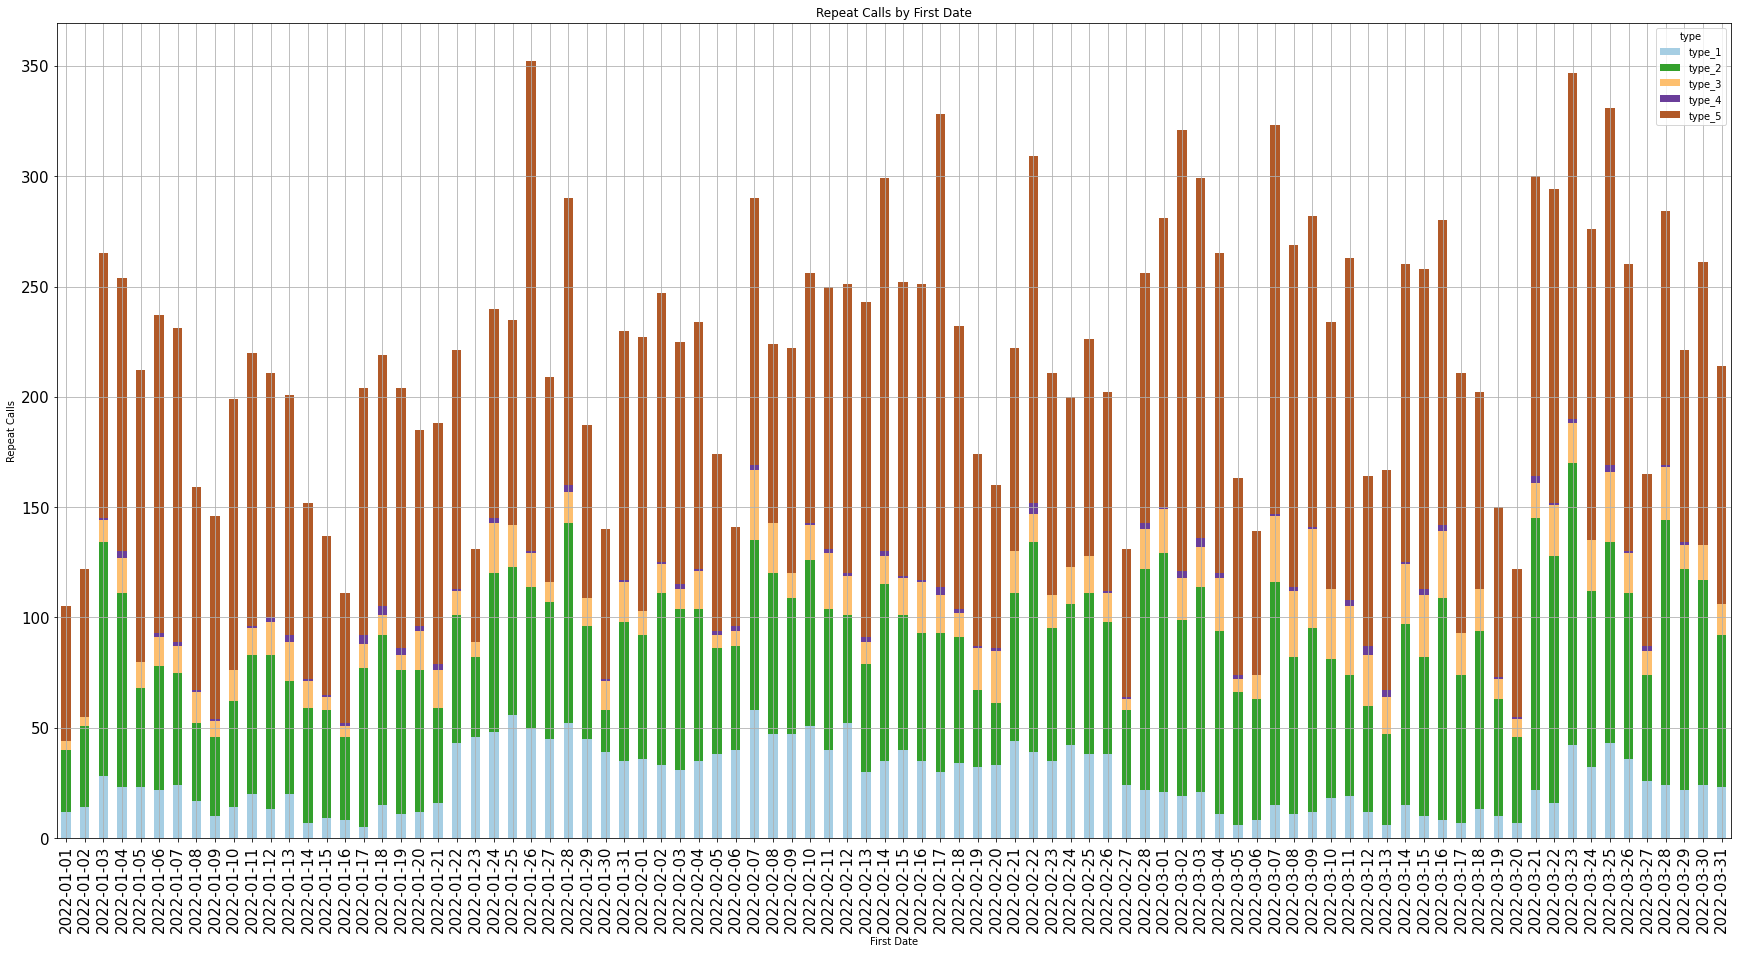

In [10]:
# A chart or table measuring repeat calls by their first contact date

# Calculate sum of repeat calls
df['repeats'] = df['contacts_n1'] + df['contacts_n2'] + df['contacts_n3'] + df['contacts_n4'] + df['contacts_n5'] + df['contacts_n6'] + df['contacts_n7']

# Create a pivot table to summarize repeat calls for each type
table10 = pd.pivot_table(df, values='repeats', index=['date_created'], columns=['type'], aggfunc=np.sum)
print("Pivot table summarizing repeat calls for each type")
print()
print(table.head(10))

# Plot a stacked bar plot 
table10.plot(kind='bar', stacked=True, figsize=(30,15), linewidth=0, grid=True, fontsize=15, colormap='Paired')
plt.xlabel('First Date')
plt.ylabel('Repeat Calls')
plt.title('Repeat Calls by First Date')
plt.show()


Pivot table summarizing repeat calls for each market

type          type_1  type_2  type_3  type_4  type_5
date_created                                        
2022-01-01        12      28       4       0      61
2022-01-02        14      37       4       0      67
2022-01-03        28     106      10       1     120
2022-01-04        23      88      16       3     124
2022-01-05        23      45      12       0     132
2022-01-06        22      56      13       2     144
2022-01-07        24      51      12       2     142
2022-01-08        17      35      14       1      92
2022-01-09        10      36       7       1      92
2022-01-10        14      48      14       0     123


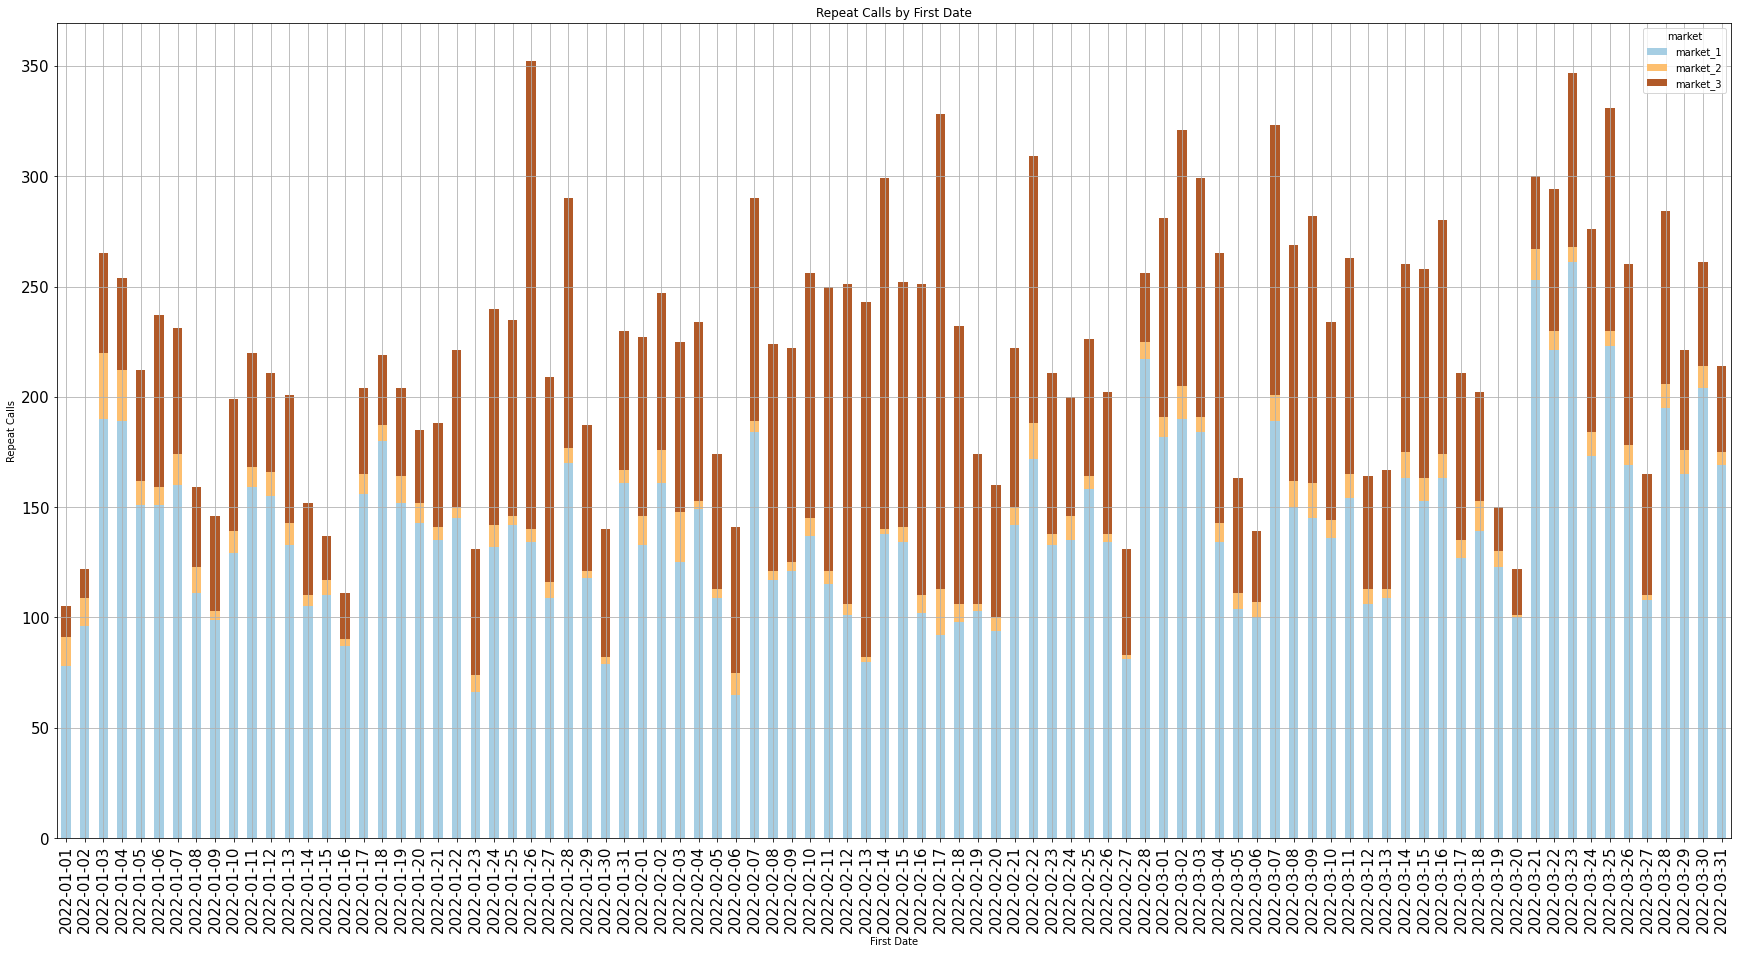

In [9]:
# A chart or table measuring repeat calls by their first contact date

# Create a pivot table to summarize repeat calls for each market
table11 = pd.pivot_table(df, values='repeats', index=['date_created'], columns=['market'], aggfunc=np.sum)
print("Pivot table summarizing repeat calls for each market")
print()
print(table.head(10))

# Plot a stacked bar plot 
table11.plot(kind='bar', stacked=True, figsize=(30,15), linewidth=0, grid=True, fontsize=15, colormap='Paired')
plt.xlabel('First Date')
plt.ylabel('Repeat Calls')
plt.title('Repeat Calls by First Date')
plt.show()


Text(0.5, 1.0, 'Market and type of first repeat call')

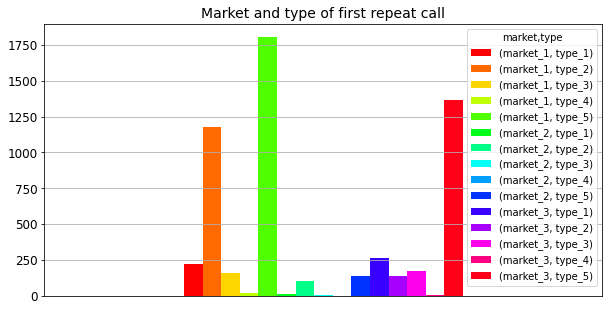

In [18]:
# Chart illustrating the market and problem type of first repeat calls

# Create a pivot table to summarize first repeat call for each market-type
table2 = pd.pivot_table(df, values='contacts_n1', columns=['market', 'type'], aggfunc=np.sum)
table2.plot(kind='bar', stacked=False, figsize=(10,5), linewidth=0, grid=True, fontsize=12, xticks=[], colormap='hsv' )
plt.title('Market and type of first repeat call', fontsize='14')



Text(0.5, 1.0, 'Market and type of repeat calls')

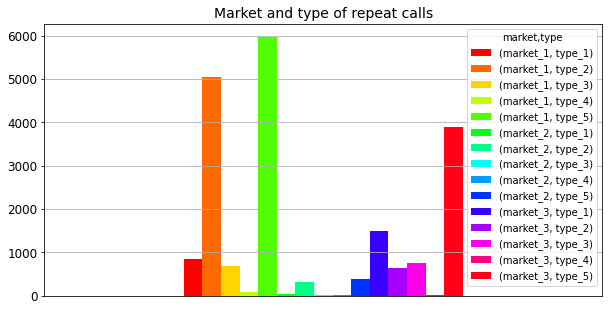

In [17]:
# A chart or table exploring repeat calls by market and problem type

table3 = pd.pivot_table(df, values='repeats', columns=['market', 'type'], aggfunc=np.sum)
table3.plot(kind='bar', stacked=False, figsize=(10,5), linewidth=0, grid=True, fontsize=12, xticks=[], colormap='hsv' )
plt.title('Market and type of repeat calls', fontsize='14')


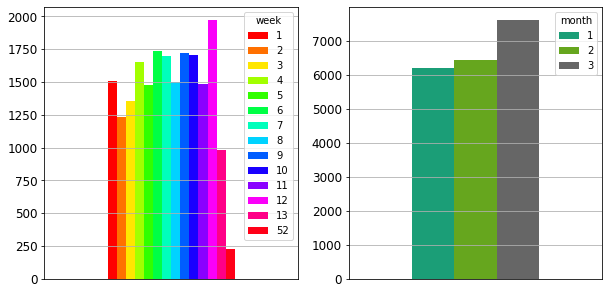

In [21]:
# Charts showcasing repeat calls by week and month

df['date_created'] = pd.to_datetime(df['date_created'])
df['week'] = df['date_created'].dt.isocalendar().week
df['month'] = df['date_created'].dt.month

table4_week = pd.pivot_table(df, values='repeats', columns=['week'], aggfunc=np.sum)
table4_month = pd.pivot_table(df, values='repeats', columns=['month'], aggfunc=np.sum)

fig, ax = plt.subplots(1, 2, figsize = (22,8))

table4_week.plot(kind='bar', stacked=False, figsize=(10,5), linewidth=0, grid=True, fontsize=12, xticks=[], colormap='hsv', ax=ax[0] )
table4_month.plot(kind='bar', stacked=False, figsize=(10,5), linewidth=0, grid=True, fontsize=12, xticks=[], colormap='Dark2', ax=ax[1] )

plt.show()

## Executive Summary
I managed to accomplish an end-to-end BI project. I developed the documents that are typically necessary for stipulating the requirements of a BI project. I designed an ETL pipeline to extract data from three sources and consolidate it into a destination table making the data more consistent and cleaner along the way. 
I explored the data to find the detailed patterns of repeat calls by day, week, month, type, and market.


## Conclusion, Recommendations, Next Steps
According to the charts, problem type_5 makes more repeat calls among others. type_2, type_1 and type_3 sit in the next places. Market_1 makes the maximum number of calls, market_3 is the second and market_2 the third. 
The pair (market_1, type_5) have had the most first repeat calls, next come pairs (market_3, type_5) and (market_1, type_2). The same ranking applies to total repeat calls. 
Excluding a peak in week 12, repeat calls show an almost even trend during weeks and months. 

As a further step, I could have developed an Chi-Square goodness of fit test to make sure that the repeat calls are evenly distributed along the days, weeks, and months.


> #### <div style="color:#17163D">**”Thy face came into my heart: my desire I shall gain. For after the happy omen, is the happy state.”**📊🍀🔮
Hafiz<br/>
</div>
